In [1]:
import numpy as np
import array

In [2]:
np.__version__

'1.19.1'

In [3]:
np?

In [4]:
%%timeit
[i for i in range(100000)]

3.8 ms ± 264 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%%timeit
np_arr = np.arange(100000)

36.3 µs ± 851 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
np_arr = np.array([1, 2, 3, 4, 5])
type(np_arr[0])

numpy.int64

Если же необходимо явным образом задать тип данных для итогового массива, можно воспользоваться ключевым словом dtype:

In [7]:
np_arr_float = np.array([1, 2, 3, 4, 5], dtype='float32')
type(np_arr_float[0])

numpy.float32

In [8]:
%%timeit
np.array([range(i, i + 3) for i in range(1000)])

4.39 ms ± 96.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Создание массивов с нуля

In [9]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
np.ones((3, 5), float)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [11]:
# Создаем массив размером 3 x 5, заполненный значением 3.14

np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [12]:
# Создаем массив, заполненный линейной последовательностью,
# начинающейся с 0 и заканчивающейся 20, с шагом 2
# (аналогично встроенной функции range())

np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [13]:
# Создаем массив из пяти значений,
# равномерно располагающихся между 0 и 1

np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [14]:
# Создаем массив размером 3 x 3 равномерно распределенных
# случайных значения от 0 до 1

np.random.random((3, 3))

array([[0.46224035, 0.51711498, 0.82943559],
       [0.80813738, 0.32363495, 0.4596438 ],
       [0.80136877, 0.00504567, 0.94318308]])

In [15]:
# Создаем массив размером 3 x 3 нормально распределенных
# случайных значения с медианой 0 и стандартным отклонением 1

np.random.normal(0, 1, (3, 3))

array([[ 1.06705685, -0.60818644,  0.22082018],
       [-1.33880811, -0.09728705, -1.33642103],
       [-0.3468755 , -0.02725384,  0.10616118]])

In [16]:
# Создаем массив размером 3 x 3 случайных целых числа
# в промежутке [0, 10)

np.random.randint(0, 10, (3, 3))

array([[3, 7, 6],
       [9, 1, 8],
       [4, 2, 6]])

In [17]:
# Создаем единичную матрицу размером 3 x 3

np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [18]:
# Создаем неинициализированный массив из трех целочисленных
# значений. Значениями будут произвольные, случайно оказавшиеся
# в соответствующих ячейках памяти данные

np.empty(3)

array([1., 1., 1.])

## Атрибуты массивов библиотеки NumPy

In [19]:
np.random.seed(0) # начальное значение для целей воспроизводимости

In [20]:
x1 = np.random.randint(10, size=6) # одномерный массив
x2 = np.random.randint(10, size=(3, 4)) # двумерный массив
x3 = np.random.randint(10, size=(3, 4, 5)) # трехмерный массив

У каждого из массивов есть атрибуты ndim (размерность), shape (размер каждого измерения) и size (общий размер массива):

In [21]:
print(x3)

[[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]]


In [22]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)
print("dtype:", x3.dtype) #тип данных массива
print("itemsize:", x3.itemsize, "bytes") # itemsize, выводящий размер (в байтах) каждого эле- мента массива
print("nbytes:", x3.nbytes, "bytes") # nbytes, выводящий полный размер массива (в байтах)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
dtype: int64
itemsize: 8 bytes
nbytes: 480 bytes


*В отличие от списков языка Python, у массивов NumPy фикси- рованный тип данных. При попытке вставить в массив целых чисел значение с пла- вающей точкой это значение будет незаметно усечено.*

## Срезы массивов: доступ к подмассивам

Аналогично доступу к отдельным элементам массива можно использовать квадрат- ные скобки для доступа к подмассивам с помощью срезов (slicing), обозначаемых знаком двоеточия (:). Синтаксис срезов библиотеки NumPy соответствует анало- гичному синтаксису для стандартных списков языка Python. Для доступа к срезу массива x используйте синтаксис:


#### x[начало : конец : шаг]

Если какие-либо из этих значений не указаны, значения применяются по умолча- нию: начало = 0, конец = размер соответствующего измерения, шаг = 1. Мы рас- смотрим доступ к массивам в одном и нескольких измерениях.

### Одномерные подмассивы

In [23]:
x = np.arange(10)

In [24]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
x[:5]

array([0, 1, 2, 3, 4])

In [26]:
x[5:]

array([5, 6, 7, 8, 9])

In [27]:
x[4:7]

array([4, 5, 6])

In [28]:
# каждый второй элемент
x[::2]

array([0, 2, 4, 6, 8])

In [29]:
# каждый второй элемент, начиная с индекса 1
x[1::2]

array([1, 3, 5, 7, 9])

In [30]:
# все элементы в обратном порядке
x[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [31]:
# каждый второй элемент в обратном порядке,
# начиная с индекса 5

x[5::-2]

array([5, 3, 1])

### Многомерные подмассивы

Многомерные срезы задаются схожим образом, с разделением срезов запятыми. Например:

In [32]:
x2 = np.random.randint(15, size=(3, 4))

In [33]:
x2

array([[ 4,  3, 12,  4],
       [ 4,  8, 14,  4],
       [ 3, 10,  7, 13]])

In [34]:
# две строки, три столбца
x2[:2, :3]

array([[ 4,  3, 12],
       [ 4,  8, 14]])

In [35]:
# все строки, каждый второй столбец
x2[:3, ::2]

array([[ 4, 12],
       [ 4, 14],
       [ 3,  7]])

In [36]:
# Измерения подмассивов также можно «переворачивать»:
x2[::-1, ::-1]

array([[13,  7, 10,  3],
       [ 4, 14,  8,  4],
       [ 4, 12,  3,  4]])

#### Доступ к строкам и столбцам массива

Часто возникает необходимость в доступе к отдельным строкам или столбцам массива. Предоставить доступ можно путем комбинации индексации и среза, с по- мощью пустого среза, задаваемого двоеточием (:):

In [37]:
#  первый столбец массива x2
x2[:, 0]

array([4, 4, 3])

In [38]:
# первая строка массива x2
x2[0, :]

array([ 4,  3, 12,  4])

В случае предоставления доступа к строке пустой срез можно опустить ради более лаконичного синтаксиса:

In [39]:
x2[0]

array([ 4,  3, 12,  4])

Срезы массивов возвращают представления (views), а не копии (copies) данных массива. Этим срезы массивов библиотеки NumPy отличаются от срезов списков языка Python (в списках срезы являются копиями). Извлечем из нашего массива двумерный подмассив 2 × 2:

In [40]:
x2_sub = x2[:2, :2]

In [41]:
x2_sub

array([[4, 3],
       [4, 8]])

Теперь, если мы изменим этот подмассив, увидим, что исходный массив также поменялся

In [42]:
x2_sub[0, 0] = 99

In [43]:
print(x2_sub)

[[99  3]
 [ 4  8]]


In [44]:
print(x2)

[[99  3 12  4]
 [ 4  8 14  4]
 [ 3 10  7 13]]


Такое поведение по умолчанию действительно очень удобно: при работе с боль- шими наборами данных не требуется копировать базовый буфер данных для об- ращения к их частям и обработки этих частей.

#### Создание копий массивов

In [45]:
x2_sub_copy = x2[:2, :2].copy()

In [46]:
x2_sub_copy[0, 0] = 100

In [47]:
print(x2_sub_copy)

[[100   3]
 [  4   8]]


In [48]:
print(x2)

[[99  3 12  4]
 [ 4  8 14  4]
 [ 3 10  7 13]]


#### Изменение формы массивов

Еще одна удобная операция — изменение формы массивов методом reshape(). На- пример, если вам требуется поместить числа от 1 до 9 в таблицу 3 × 3, сделать это можно следующим образом:

In [49]:
np.arange(1, 10).reshape((3,3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [50]:
x = np.array([1, 2, 3])

In [51]:
# Преобразование в вектор-строку с помощью reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [52]:
# Преобразование в вектор-строку посредством newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [53]:
# Преобразование в вектор-столбец с помощью reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [54]:
# Преобразование в вектор-столбец посредством newaxis
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

### Слияние массивов

Слияние, или объединение, двух массивов в библиотеке NumPy выполняется в основном с помощью методов **np.concatenate**, **np.vstack** и **np.hstack**. Метод np.concatenate принимает на входе кортеж или список массивов в качестве перво- го аргумента:

In [55]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])

np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

Для объединения двумерных массивов можно также использовать np.concatenate:

In [58]:
grid = np.array([[1, 2, 3], [4, 5, 6]])
print(grid)

[[1 2 3]
 [4 5 6]]


In [59]:
# слияние по первой оси координат
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [60]:
# слияние по второй оси координат (с индексом 0)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

Для работы с массивами с различающимися измерениями удобнее и понятнее использовать функции **np.vstack** (вертикальное объединение) и **np.hstack** (гори- зонтальное объединение):

In [61]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7], [6, 5, 4]])

# Объединяет массивы по вертикали
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [62]:
# Объединяет массивы по горизонтали
y = np.array([[99], [99]])

np.hstack([grid, y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

Функция **np.dstack** аналогично объединяет массивы по третьей оси.

## Разбиение массивов

Противоположностью слияния является разбиение, выполняемое с помощью функций **np.split, np.hsplit и np.vsplit**. Каждой из них необходимо передавать список индексов, задающих точки раздела:

In [63]:
x = [1, 2, 3, 99, 99, 3, 2, 1]

x1, x2, x3 = np.split(x, [3, 5])

print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


Обратите внимание, что N точек раздела означают N + 1 подмассив. Соответству- ющие функции np.hsplit и np.vsplit действуют аналогично:

In [64]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [65]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [66]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


Функция np.dsplit аналогично разделяет массивы по третьей оси.

## Тригонометрические функции

Библиотека NumPy предоставляет множество универсальных функций, одни из наиболее важных — тригонометрические функции. Начнем с описания массива углов:

In [68]:
theta = np.linspace(0, np.pi, 3)

Теперь мы можем вычислить некоторые тригонометрические функции от этих значений:

In [70]:
print("theta = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


## Показательные функции и логарифмы

In [71]:
x = [1, 2, 3]

print("x =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3, x))

x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]


Функции, обратные к показательным, и логарифмы также имеются в библиотеке. Простейшая функция np.log возвращает натуральный логарифм числа. Если вам требуется логарифм по основанию 2 или 10, они также доступны:

In [72]:
x = [1, 2, 4, 10]

print("x =", x)
print("ln(x) =", np.log(x))
print("log2(x) =", np.log2(x))
print("log10(x) =", np.log10(x))

x = [1, 2, 4, 10]
ln(x) = [0.         0.69314718 1.38629436 2.30258509]
log2(x) = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


## Специализированные универсальные функции

В библиотеке NumPy имеется немало других универсальных функций, включая гиперболические тригонометрические функции, поразрядную арифметику, опера- торы сравнения, преобразования из радианов в градусы, округление и остатки от деления, а также многое другое. Если вы заглянете в документацию по библиотеке NumPy, то откроете для себя немало интересной функциональности.
Если один замечательный источник специализированных и сложных универ- сальных функций — подмодуль scipy.special. Если вам необходимо вычислить значение какой-то хитрой математической функции на ваших данных, очень воз- можно, что эта функциональность уже реализована в scipy.special. Следующий фрагмент кода демонстрирует несколько функций, которые могут пригодиться для статистических вычислений:

In [73]:
from scipy import special

In [74]:
x = [1, 5, 10]

print("gamma(x) =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2) =", special.beta(x, 2))

gamma(x) = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2) = [0.5        0.03333333 0.00909091]


## Указание массива для вывода результата

При больших вычислениях удобно задать массив, в котором будет сохранен резуль- тат вычисления. Вместо того чтобы создавать временный массив, можно восполь- зоваться этой возможностью для записи результатов вычислений непосредственно в нужное вам место памяти. Сделать это для любой универсальной функции можно с помощью аргумента out:

In [75]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)

print(y)

[ 0. 10. 20. 30. 40.]


Эту возможность можно использовать даже вместе с представлениями массивов. Например, можно записать результаты вычислений в каждый второй элемент за- данного массива:

In [76]:
y = np.zeros(10)
np.power(2, x, out=y[::2])

print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


Если бы мы вместо этого написали y[::2] = 2 ** x, был бы создан временный массив для хранения результатов операции 2 ** x с последующим копированием этих значений в массив y. Для столь незначительных объемов вычислений особой разницы нет, но для очень больших массивов экономия памяти за счет аккуратного использования аргумента out может оказаться значительной.

## Сводные показатели

вызов метода reduce для универсальной функции add возвращает сумму всех элементов массива:

In [77]:
x = np.arange(1, 6)
np.add.reduce(x)

15

In [78]:
np.multiply.reduce(x)

120

Если же мы хотим сохранить все промежуточные результаты вычислений, можно вместо reduce воспользоваться функцией accumulate:

In [79]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

## Суммирование значений из массива

In [80]:
L = np.random.random(100)

sum(L)

51.163886927509324

In [81]:
np.sum(L)

51.16388692750932

поскольку функция sum выполняет операцию в скомпилированном коде, версия библиотеки NumPy данной операции работает намного быстрее:

In [82]:
big_array = np.random.rand(1000000)

%timeit sum(big_array)
%timeit np.sum(big_array)

138 ms ± 5.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
386 µs ± 22.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [83]:
%timeit min(big_array)
%timeit np.min(big_array)

89.7 ms ± 3.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
534 µs ± 58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [84]:
%timeit max(big_array)
%timeit np.max(big_array)

83.2 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
449 µs ± 8.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Многомерные сводные показатели

Агрегирование по столбцу или строке — один из часто применяемых видов операций агрегирования. Пусть имеются какие-либо данные, находящиеся в двумерном массиве:

In [85]:
M = np.random.random((3, 4))
print(M)

[[0.53509    0.88518089 0.25518136 0.13130483]
 [0.95884927 0.17809462 0.61130112 0.7044003 ]
 [0.89172417 0.51511729 0.73705298 0.17818634]]


По умолчанию все функции агрегирования библиотеки NumPy возвращают свод- ный показатель по всему массиву:

In [86]:
M.sum()

6.581483155011551

Но функции агрегирования принимают на входе дополнительный аргумент, по- зволяющий указать ось, по которой вычисляется сводный показатель. Например, можно найти минимальное значение каждого из столбцов, указав axis=0:

In [87]:
M.min(axis=0)

array([0.53509   , 0.17809462, 0.25518136, 0.13130483])

Аналогично можно вычислить максимальное значение в каждой из строк:

In [89]:
M.max(axis=1)

array([0.88518089, 0.95884927, 0.89172417])

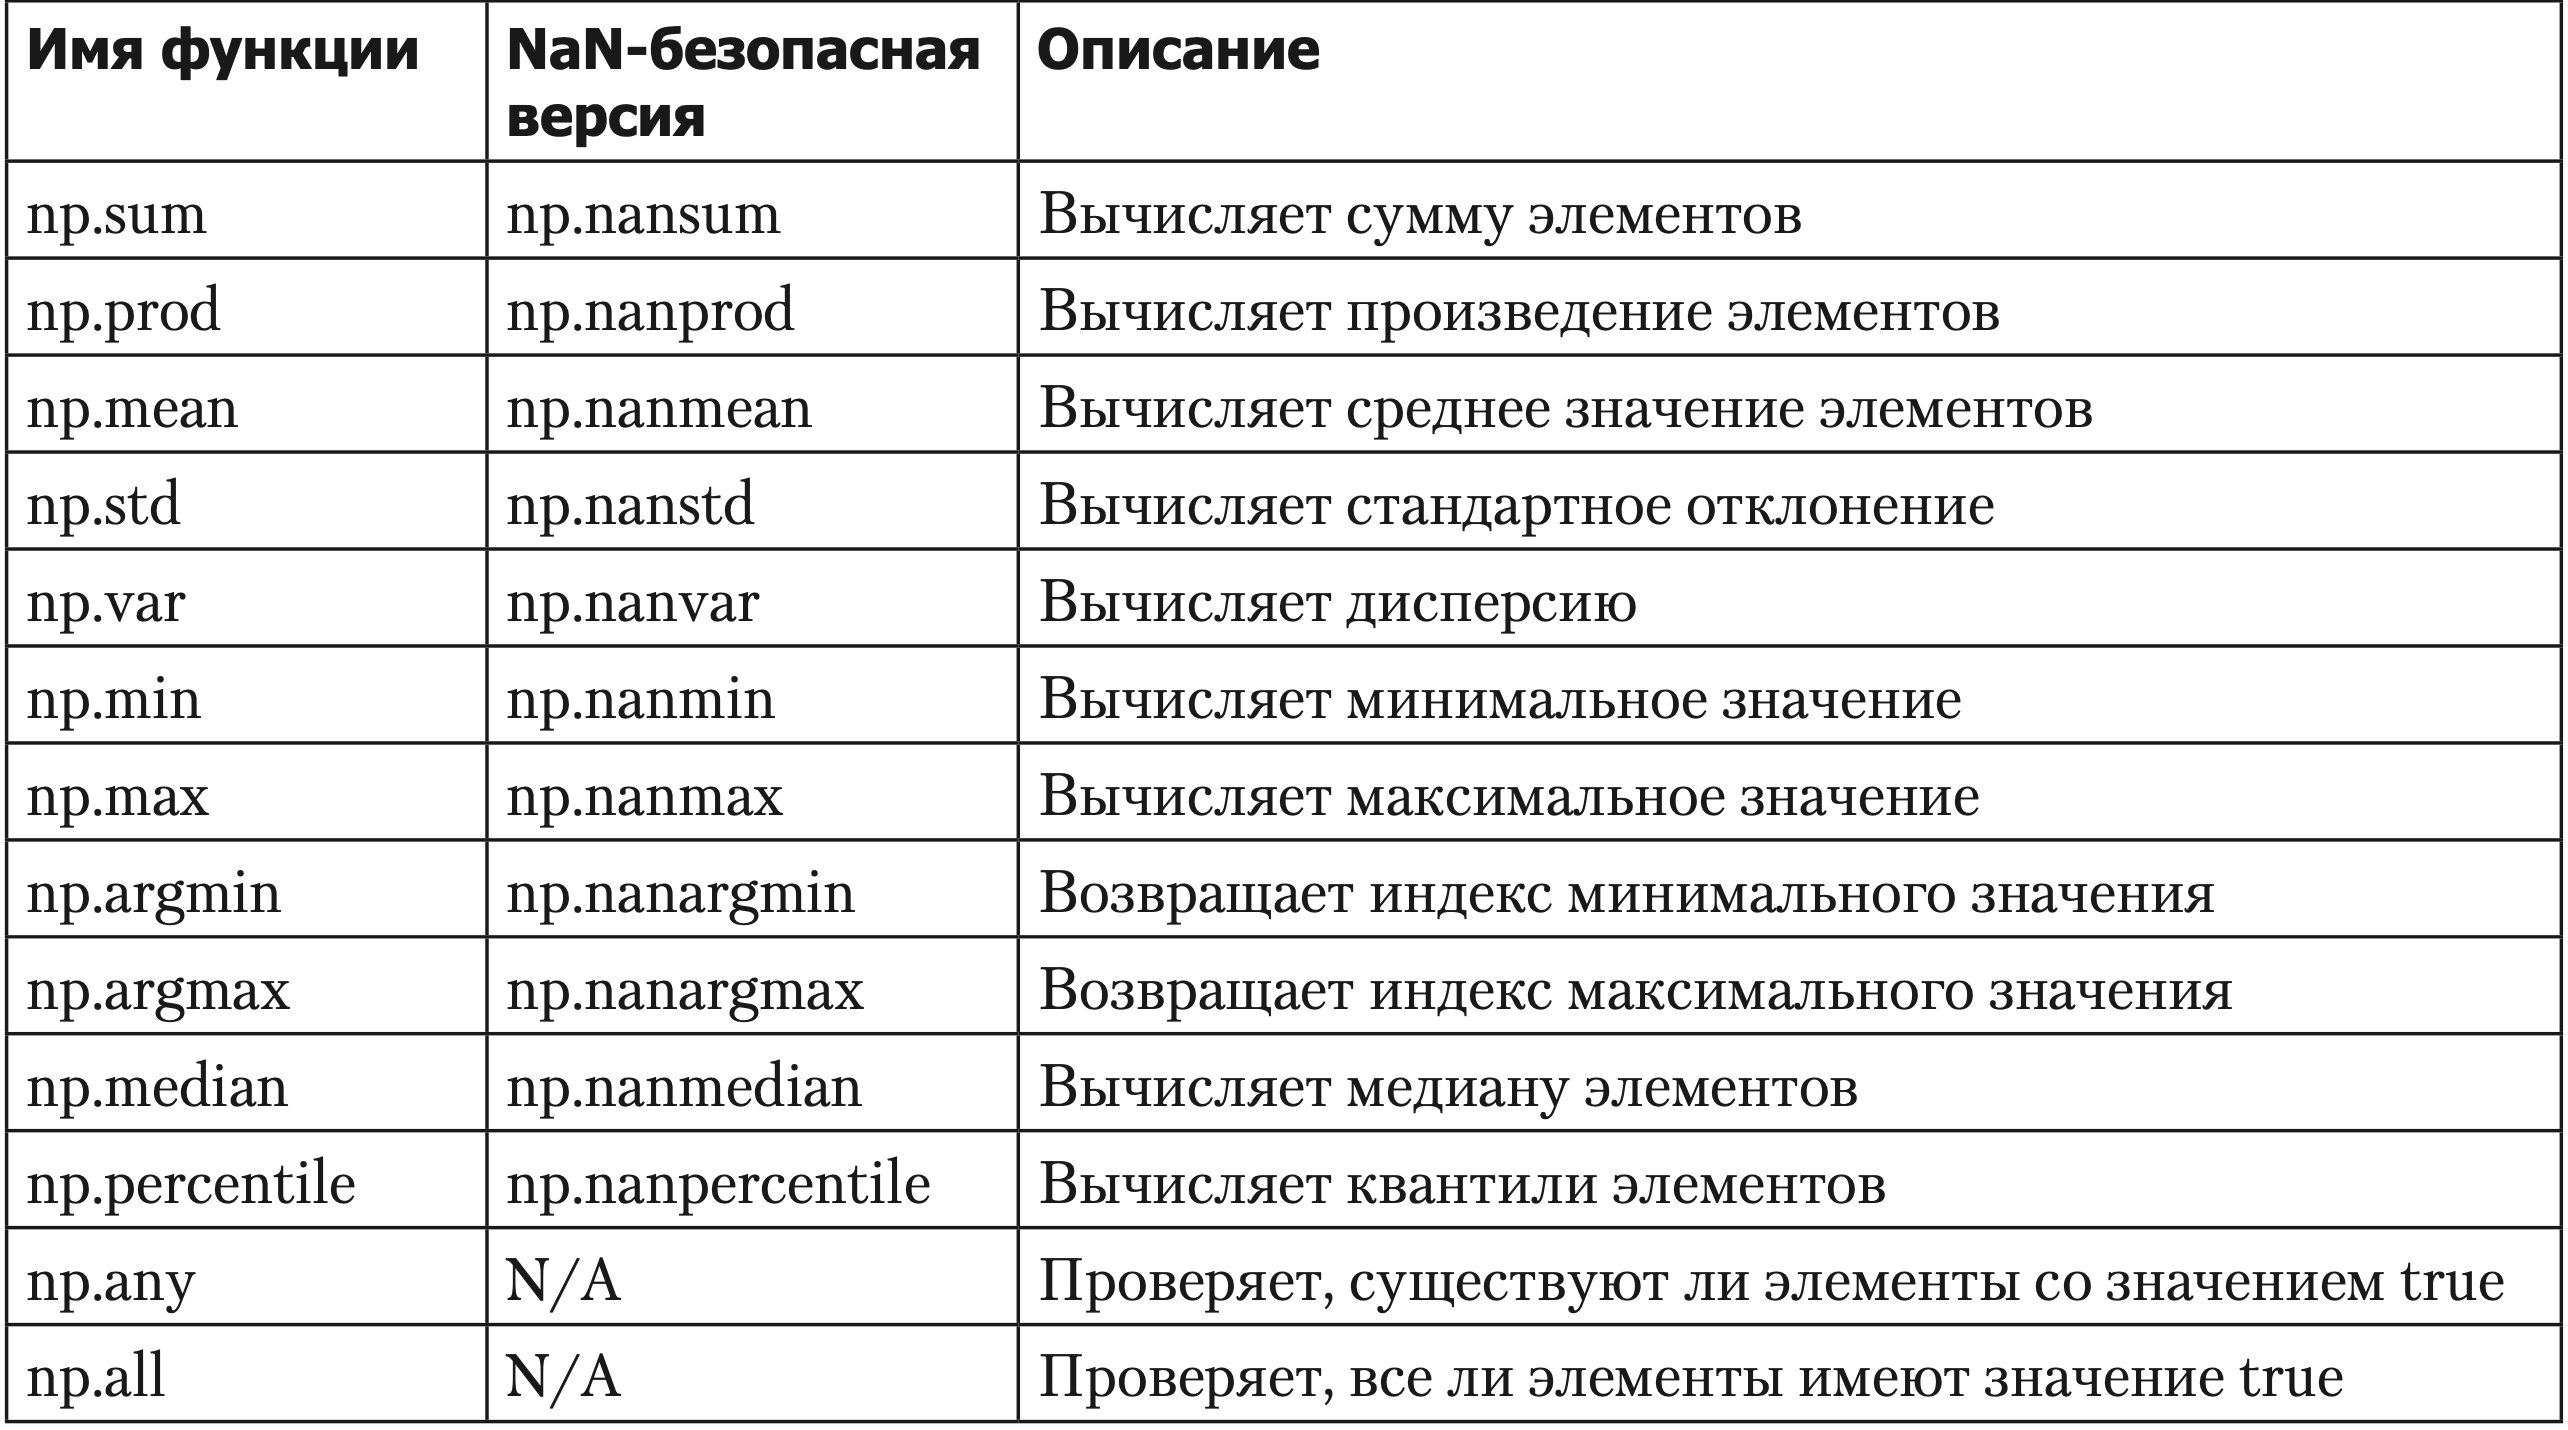

### Пример: чему равен средний рост президентов США

In [90]:
import pandas as pd
data = pd.read_csv('./../data/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Теперь, получив такой массив данных, мы можем вычислить множество сводных статистических показателей:

In [91]:
print("Mean height: ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height: ", heights.min())
print("Maximum height: ", heights.max())

Mean height:  179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:  163
Maximum height:  193


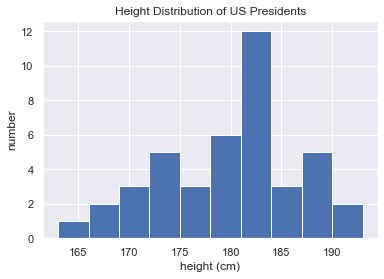

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # задает стиль графика

plt.hist(heights)
plt.title('Height Distribution of US Presidents') # Распределение роста

# президентов США
plt.xlabel('height (cm)') # Рост, см
plt.ylabel('number'); # Количество

## Операторы сравнения как универсальные функции

In [94]:
x = np.array([1, 2, 3, 4, 5])

In [95]:
x < 3

array([ True,  True, False, False, False])

In [98]:
x[x <= 3]

array([1, 2, 3])

In [97]:
x[x > 3]

array([4, 5])

In [100]:
np.count_nonzero(x < 3)

2

In [101]:
np.sum(x < 3)

2

In [102]:
np.any(x < 3)

True

In [104]:
np.any(x > 6)

False

In [107]:
# Все ли значения меньше 3?
np.all(x > 3)

False

In [113]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [114]:
np.all(x < 8, axis=1)

array([ True, False,  True])

In [115]:
np.all((x>0)&(x<6))

False

In [116]:
np.any((x>2)&(x<5))

True

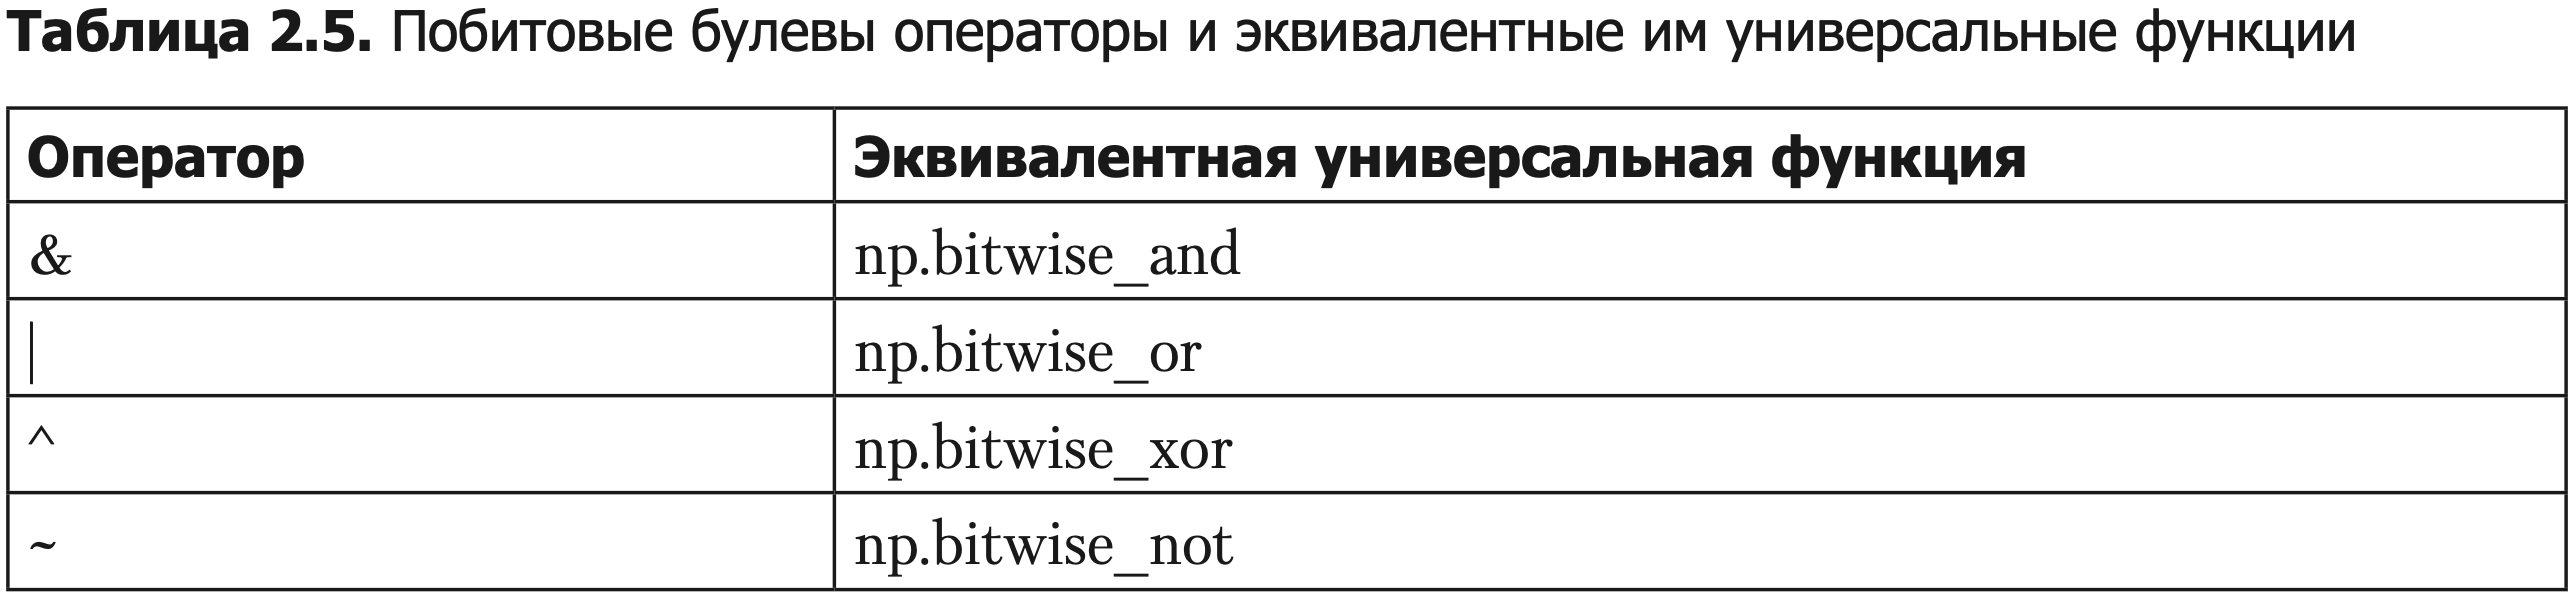